In [48]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, accuracy_score,classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
#Reading from CSV File and Storing in Dataframe
X_train = pd.read_csv('../../Dataset/x_train_all.csv')
y_train = pd.read_csv('../../Dataset/y_train_all.csv')
X_test = pd.read_csv('../../Dataset/x_test_all.csv')
y_test = pd.read_csv('../../Dataset/y_test_all.csv')

In [16]:
#Printing the shapes of the training
print("========================================")
print("=   Shape to train and test Dataset    =")
print("========================================")
print("= Shape of X_train is  :", X_train.shape)
print("= Shape of y_train is  :", y_train.shape)
print("= Shape of X_test is   :", X_test.shape)
print("= Shape of y_test is   :", y_test.shape)
print("========================================")

=   Shape to train and test Dataset    =
= Shape of X_train is  : (9690, 2304)
= Shape of y_train is  : (9690, 1)
= Shape of X_test is   : (3090, 2304)
= Shape of y_test is   : (3090, 1)


In [24]:
# Define the scaler and applying it to train dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [25]:
# Applying the scaler to test dataset
X_test_scaled = scaler.transform(X_test)

In [26]:
# Defining the model
sgd = SGDClassifier(max_iter=1000, tol=1e-3)

In [27]:
# Fitting the data into the model
sgd.fit(X_train_scaled, y_train)

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier()

In [34]:
# Calculating the accuracy on train dataset
train_accuracy = sgd.score(X_train_scaled, y_train)

# Printing the accuracy on train dataset
print("========================================")
print("=   Accuracy on train dataset          =")
print("========================================")
print("= Accuracy :", round(train_accuracy * 100,2))
print("========================================")


=   Accuracy on train dataset          =
= Accuracy : 88.84


In [29]:
# Cross Validation on the model
y_pred_cross = cross_val_predict(sgd, X_train, y_train, cv=10)

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [32]:
cv_accuracy = accuracy_score(y_train, y_pred_cross)
#Accuracy of the model cross validation data
print("========================================")
print("=   Accuracy of Training Data          =")
print("========================================")
print("= Accuracy Score is    :", round(cv_accuracy * 100,2))
print("========================================")

=   Accuracy of Training Data          =
= Accuracy Score is    : 85.28


In [39]:
y_pred = sgd.predict(X_test_scaled)

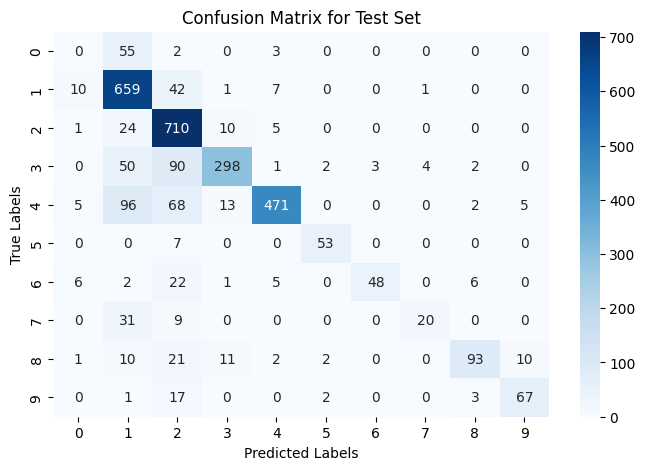

In [41]:
conf_matrix = confusion_matrix(y_test, y_pred)
# Generate and visualize the confusion matrix for the test set
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()

In [46]:
f1 = f1_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
precision = precision_score(y_test, y_pred, average=None)

In [47]:
# Creating dataframe of precision, recall, and F1-score for each class
df = pd.DataFrame({'Precision': precision, 'F1 Score': f1, 'Recall': recall})
df

,Precision,F1 Score,Recall
0,0.000000,0.000000,0.000000
1,0.710129,0.799757,0.915278
2,0.718623,0.817031,0.946667
3,0.892216,0.760204,0.662222
4,0.953441,0.816291,0.713636
5,0.898305,0.890756,0.883333
6,0.941176,0.680851,0.533333
7,0.800000,0.470588,0.333333
8,0.877358,0.726562,0.620000
9,0.817073,0.779070,0.744444


In [49]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.71      0.92      0.80       720
           2       0.72      0.95      0.82       750
           3       0.89      0.66      0.76       450
           4       0.95      0.71      0.82       660
           5       0.90      0.88      0.89        60
           6       0.94      0.53      0.68        90
           7       0.80      0.33      0.47        60
           8       0.88      0.62      0.73       150
           9       0.82      0.74      0.78        90

    accuracy                           0.78      3090
   macro avg       0.76      0.64      0.67      3090
weighted avg       0.80      0.78      0.77      3090

